|MSSV|Họ và tên|
|----|---------|
|21127012|Trần Huy Bân|
|21127191|Nguyễn Nhật Truyền|
|21127430|Nguyễn Huy Thành|
|21127507|Đinh Công Huy Hoàng|
|21127592|Nguyễn Minh Đạt|

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **ĐỌC DỮ LIỆU**

In [11]:
raw_data = pd.read_excel('/content/drive/MyDrive/clean_data.xlsx')
raw_data

,Tỉnh,Diện tích,Mật độ dân số,Năm,Dân số trung bình,Nam,Nữ,Thành Thị,Nông Thôn,Doanh thu trung bình,"Thu từ tiền lương, tiền công","Thu từ nông, lâm nghiệp, thủy sản","Thu phi nông, lâm nghiệp, thủy sản",Các khoản thu khác
0,CẢ NƯỚC,330957.60,217.536929,1995,71995.50,35237.40,36758.10,14938.10,57057.40,1387,622,279,328,158
1,CẢ NƯỚC,330957.60,221.045536,1996,73156.70,35857.30,37299.40,15419.90,57736.80,1387,622,279,328,158
2,CẢ NƯỚC,330957.60,224.520905,1997,74306.90,36473.10,37833.80,16835.40,57471.50,1387,622,279,328,158
3,CẢ NƯỚC,330957.60,227.993858,1998,75456.30,37089.70,38366.60,17464.60,57991.70,1387,622,279,328,158
4,CẢ NƯỚC,330957.60,231.439616,1999,76596.70,37662.10,38934.60,18081.60,58515.10,1387,622,279,328,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,Cà Mau,5221.20,228.990000,2018,1195.60,605.10,590.40,270.30,925.30,2986,798,1015,813,360
1956,Cà Mau,5221.20,229.000000,2019,1194.30,604.90,589.40,271.70,922.60,3214,1112,1000,845,258
1957,Cà Mau,5274.50,226.000000,2020,1193.89,604.74,589.16,271.11,922.78,3034,1152,967,552,364
1958,Cà Mau,5274.51,229.000000,2021,1208.75,612.26,596.49,275.35,933.40,3239,1096,998,853,292


In [12]:
print(f"Dữ liệu có {raw_data.shape[0]} hàng và {raw_data.shape[1]} cột.")

Dữ liệu có 1960 hàng và 14 cột.


---

## **Ý NGHĨA CÁC CỘT DỮ LIỆU**

| **STT** | **Tên Cột**                             | **Loại Dữ Liệu**   | **Đơn Vị**                             |
|---------|-----------------------------------------|---------------------|----------------------------------------|
| 1       | Tỉnh                                    | Object              |                                        |
| 2       | Diện tích                               | Float64             | km²                                    |
| 3       | Mật độ dân số                           | Float64             | Người/km²                              |
| 4       | Năm                                     | Int64               |                                        |
| 5       | Dân số trung bình                       | Float64             | Nghìn người                            |
| 6       | Nam                                     | Float64             | Nghìn người                            |
| 7       | Nữ                                      | Float64             | Nghìn người                            |
| 8       | Thành thị                               | Float64             | Nghìn người                            |
| 9       | Nông thôn                               | Float64             | Nghìn người                            |
| 10      | Doanh thu trung bình                    | Int64               | Nghìn VND/người tính theo tháng      |
| 11      | Thu từ tiền lương, tiền công           | Int64               | Nghìn VND/người tính theo tháng      |
| 12      | Thu từ nông, lâm nghiệp, thủy sản      | Int64               | Nghìn VND/người tính theo tháng      |
| 13      | Thu phi nông, lâm nghiệp, thủy sản     | Int64               | Nghìn VND/người tính theo tháng      |
| 14      | Các khoản thu khác                      | Int64               | Nghìn VND/người tính theo tháng      |

Ý nghĩa các cột dữ liệu được lấy dựa trên trang [Tổng Cục Thống Kê](https://www.gso.gov.vn/)

---

## **KIỂM TRA BIẾN SỐ LƯỢNG**

In [13]:
index = raw_data.index
deDupSeries = index.duplicated(keep='first')
num_duplicated_rows = deDupSeries.sum()
index

RangeIndex(start=0, stop=1960, step=1)

## **KIỂM TRA SỰ TRÙNG LẶP**

In [14]:
if num_duplicated_rows == 0:
    print("Dữ liệu không có sự trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng trùng lặp.")

Dữ liệu không có sự trùng lặp!


---

## **KIỂM TRA KIỂU DỮ LIỆU**

In [15]:
raw_data.dtypes

Tỉnh                                   object
Diện tích                             float64
Mật độ dân số                         float64
Năm                                     int64
Dân số trung bình                     float64
Nam                                   float64
Nữ                                    float64
Thành Thị                             float64
Nông Thôn                             float64
Doanh thu trung bình                    int64
Thu từ tiền lương, tiền công            int64
Thu từ nông, lâm nghiệp, thủy sản       int64
Thu phi nông, lâm nghiệp, thủy sản      int64
Các khoản thu khác                      int64
dtype: object

---

## **KIỂM TRA MISSING RATE**

In [16]:
raw_data_missing = raw_data.isna().sum()
raw_data_missing_rate = (raw_data_missing / len(raw_data))*100
columns_with_missing_data = raw_data_missing_rate[raw_data_missing_rate > 0]
print(columns_with_missing_data)

Series([], dtype: float64)


- Kết quả cho thấy rằng không có cột nào trong DataFrame raw_data bị thiếu giá trị.

## **CHIA DỮ LIỆU**

In [17]:
raw_data_num_list = list(raw_data.dtypes[raw_data.dtypes != 'object'].index)
raw_data_cate_list = list(raw_data.dtypes[raw_data.dtypes == 'object'].index)

In [18]:
raw_data.dtypes.value_counts()

float64    7
int64      6
object     1
Name: count, dtype: int64

## **KIỂM TRA BIẾN DỮ LIỆU KIỂU SỐ**

In [19]:
# Tạo DataFrame mới chứa các giá trị duy nhất của các cột numerical
num_vals = raw_data.loc[:, raw_data_num_list]

# Tính số lượng giá trị duy nhất trong mỗi cột
unique_vals = num_vals.apply(pd.Series.unique, axis=0)
unique_counts = unique_vals.apply(len)

# In số lượng giá trị duy nhất trong mỗi cột
print(unique_counts)

Diện tích                              410
Mật độ dân số                         1861
Năm                                     28
Dân số trung bình                     1890
Nam                                   1843
Nữ                                    1844
Thành Thị                             1779
Nông Thôn                             1861
Doanh thu trung bình                   587
Thu từ tiền lương, tiền công           554
Thu từ nông, lâm nghiệp, thủy sản      429
Thu phi nông, lâm nghiệp, thủy sản     505
Các khoản thu khác                     384
dtype: int64


In [20]:
# In DataFrame chứa các giá trị duy nhất của các cột
unique_vals

Diện tích                             [330957.6, 330951.1, 330972.4, 330966.9, 33123...
Mật độ dân số                         [217.5369292018071, 221.0455357423428, 224.520...
Năm                                   [1995, 1996, 1997, 1998, 1999, 2000, 2001, 200...
Dân số trung bình                     [71995.5, 73156.7, 74306.9, 75456.3, 76596.7, ...
Nam                                   [35237.4, 35857.3, 36473.1, 37089.7, 37662.1, ...
Nữ                                    [36758.1, 37299.4, 37833.8, 38366.6, 38934.6, ...
Thành Thị                             [14938.1, 15419.9, 16835.4, 17464.6, 18081.6, ...
Nông Thôn                             [57057.4, 57736.8, 57471.5, 57991.7, 58515.1, ...
Doanh thu trung bình                  [1387, 2000, 2637, 3098, 3876, 4295, 4249, 420...
Thu từ tiền lương, tiền công          [622, 923, 1253, 1487, 1981, 2350, 2357, 2383,...
Thu từ nông, lâm nghiệp, thủy sản     [279, 397, 458, 510, 516, 509, 476, 454, 474, ...
Thu phi nông, lâm nghiệp, thủy s

## **KIỂM TRA BIẾN DỮ LIỆU CATEGORICAL**

In [21]:
# Tạo DataFrame mới chứa các giá trị duy nhất của các cột categorical
categorical_vals = raw_data.loc[:, raw_data_cate_list]

# Tính số lượng giá trị duy nhất trong mỗi cột
unique_vals = categorical_vals.apply(pd.Series.unique, axis=0)
unique_counts = unique_vals.apply(len)

# In số lượng giá trị duy nhất trong mỗi cột
print(unique_counts)

Tỉnh    70
dtype: int64


In [22]:
# In DataFrame chứa các giá trị duy nhất của các cột
unique_vals

,Tỉnh
0,CẢ NƯỚC
1,Ðồng bằng sông Hồng
2,Hà Nội
3,Vĩnh Phúc
4,Bắc Ninh
...,...
65,Cần Thơ
66,Hậu Giang
67,Sóc Trăng
68,Bạc Liêu


---

## **THỐNG KÊ MÔ TẢ CHO CÁC BIẾN ĐỊNH LƯỢNG**

In [23]:
raw_data[raw_data_num_list].describe()

,Diện tích,Mật độ dân số,Năm,Dân số trung bình,Nam,Nữ,Thành Thị,Nông Thôn,Doanh thu trung bình,"Thu từ tiền lương, tiền công","Thu từ nông, lâm nghiệp, thủy sản","Thu phi nông, lâm nghiệp, thủy sản",Các khoản thu khác
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000
mean,14186.758526,446.545665,2008.500000,3669.075668,1813.426020,1855.649684,1093.002755,2576.072990,1976.061224,893.721939,412.252551,452.576020,217.555612
std,41753.300493,523.873623,8.079809,10749.420751,5313.387984,5436.267798,3409.466493,7531.932749,1235.717138,739.499404,222.730705,342.454971,159.088823
min,822.700000,28.845360,1995.000000,254.200000,126.900000,127.300000,23.500000,117.500000,567.000000,193.000000,21.000000,52.000000,38.000000
25%,2468.700000,127.232880,2001.750000,830.200000,412.225000,416.800000,138.110000,617.417500,1089.000000,382.000000,264.000000,229.000000,107.000000
50%,5099.150000,248.975310,2008.500000,1192.025000,589.700000,595.810000,239.200000,868.150000,1526.000000,590.000000,357.000000,328.000000,163.000000
75%,8320.800000,572.990000,2015.250000,1762.325000,865.447500,893.055000,476.825000,1370.600000,2698.000000,1165.000000,508.000000,614.000000,287.000000
max,331345.700000,4481.000000,2022.000000,99474.420000,49590.240000,49884.170000,37350.500000,62748.300000,8076.000000,4985.000000,1549.000000,2591.000000,968.000000


#### **Vẽ histogram miêu tả phân phối**

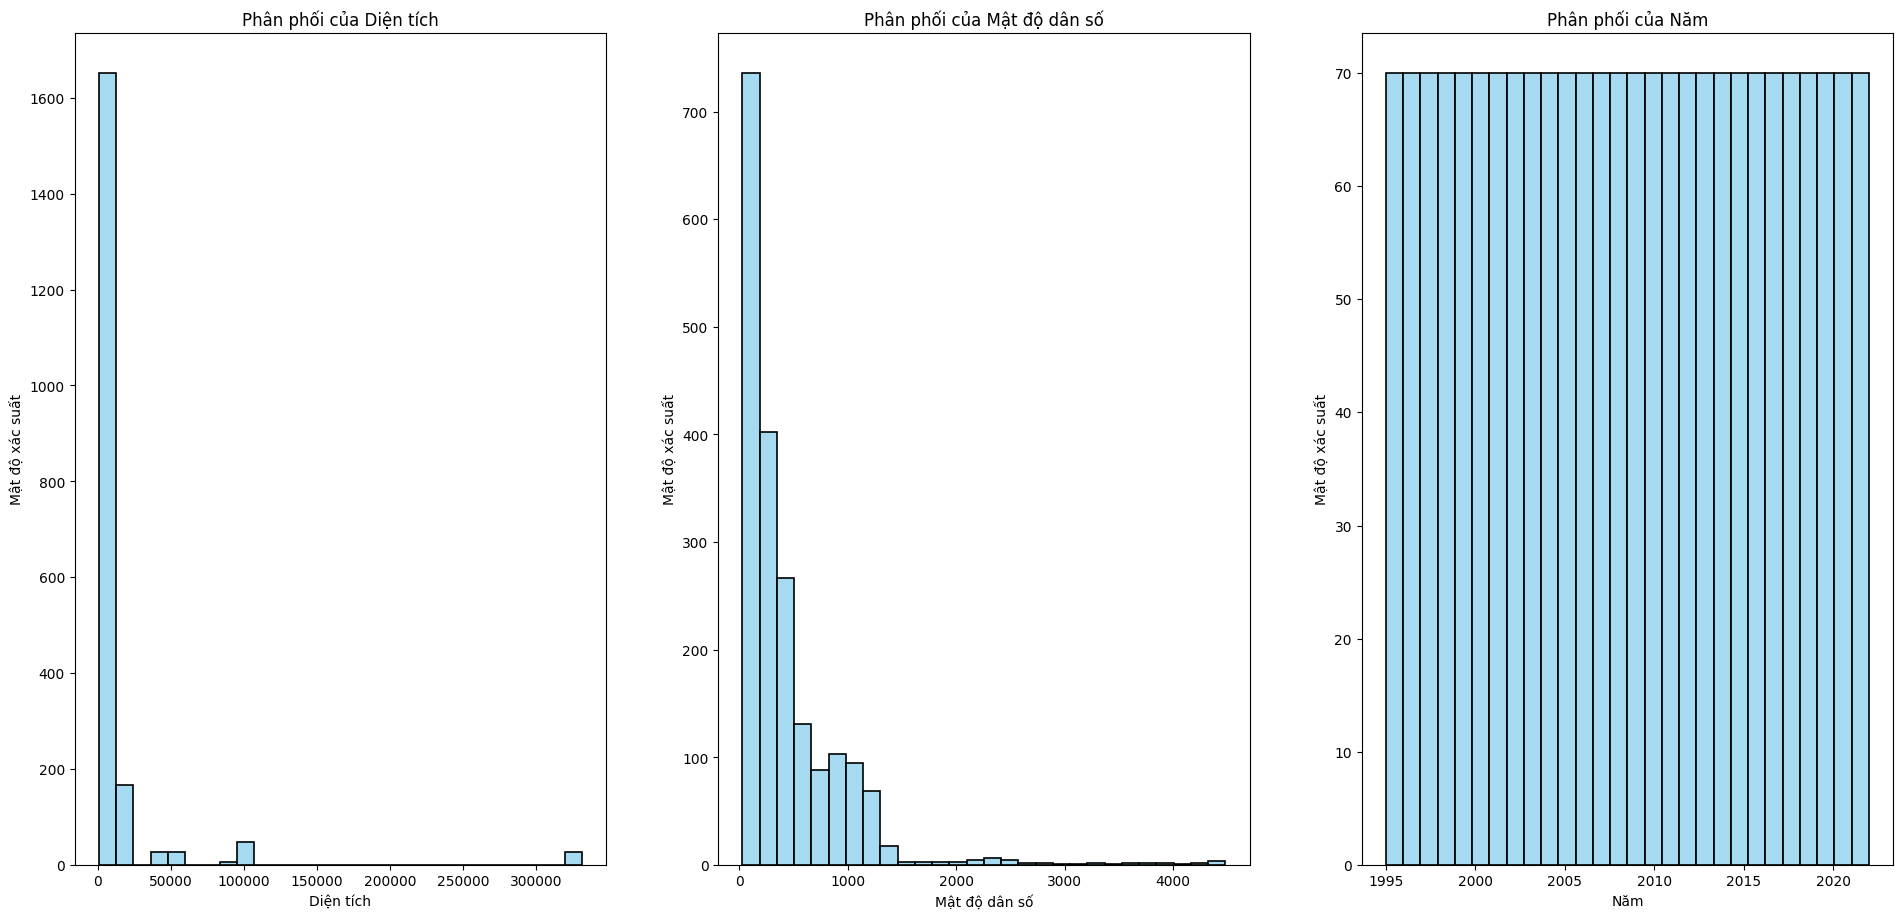

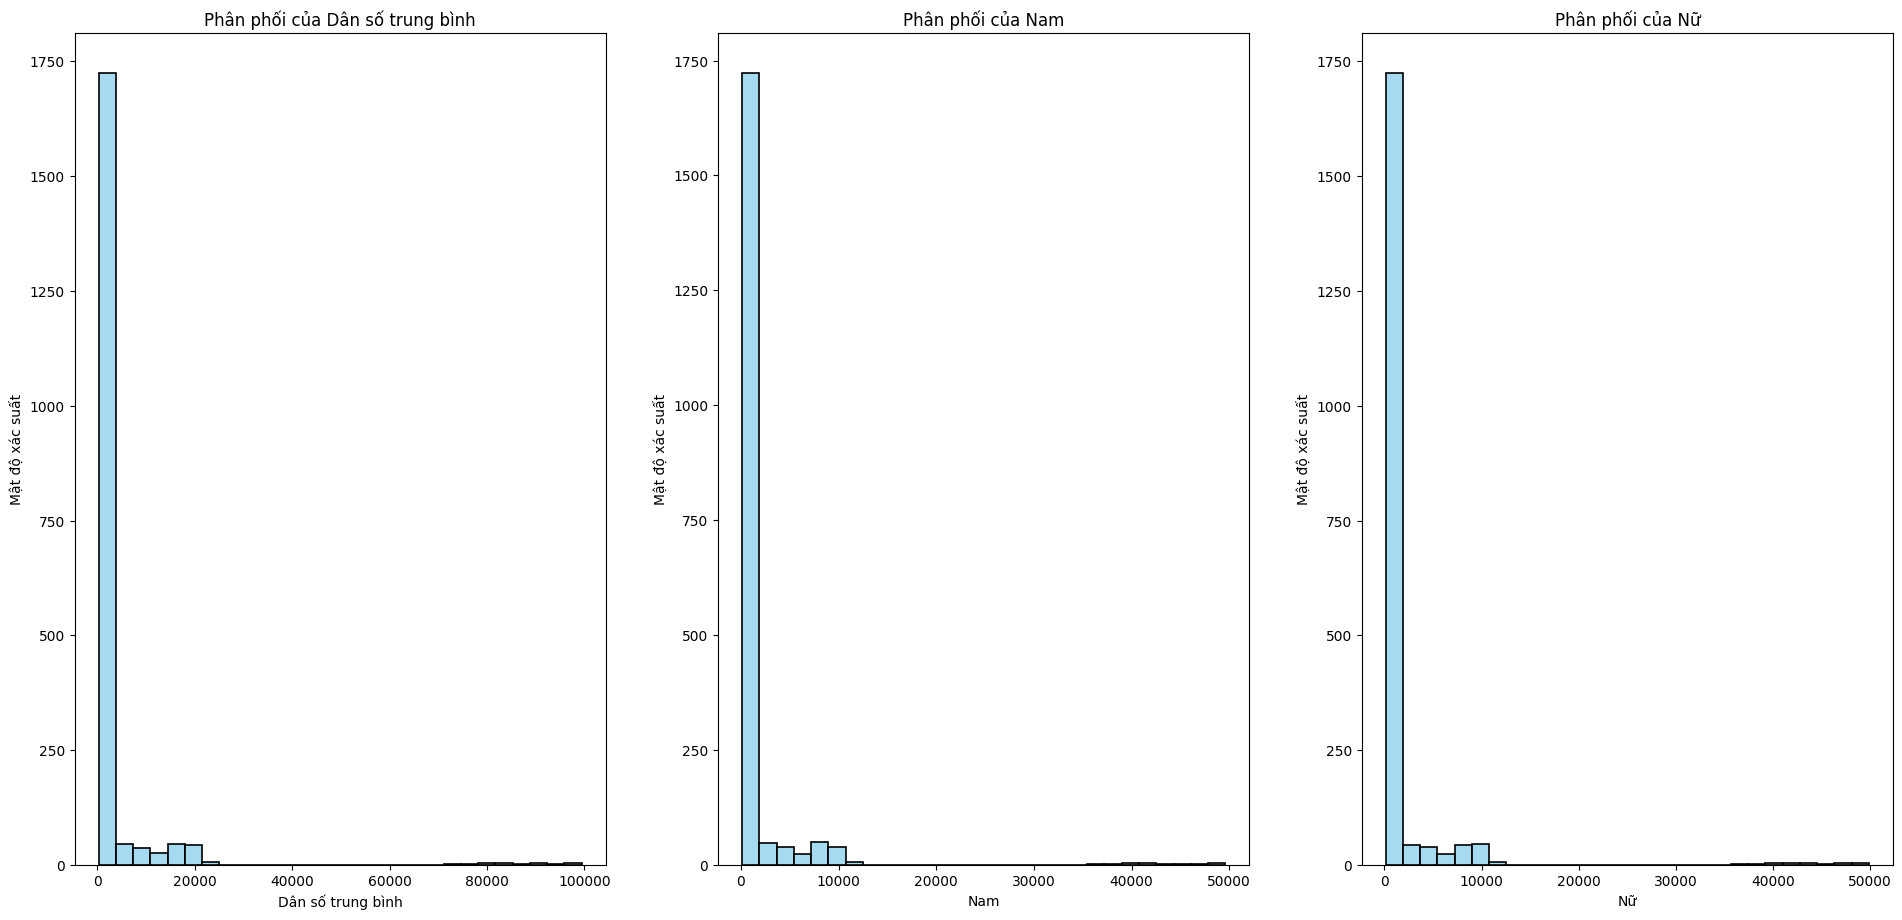

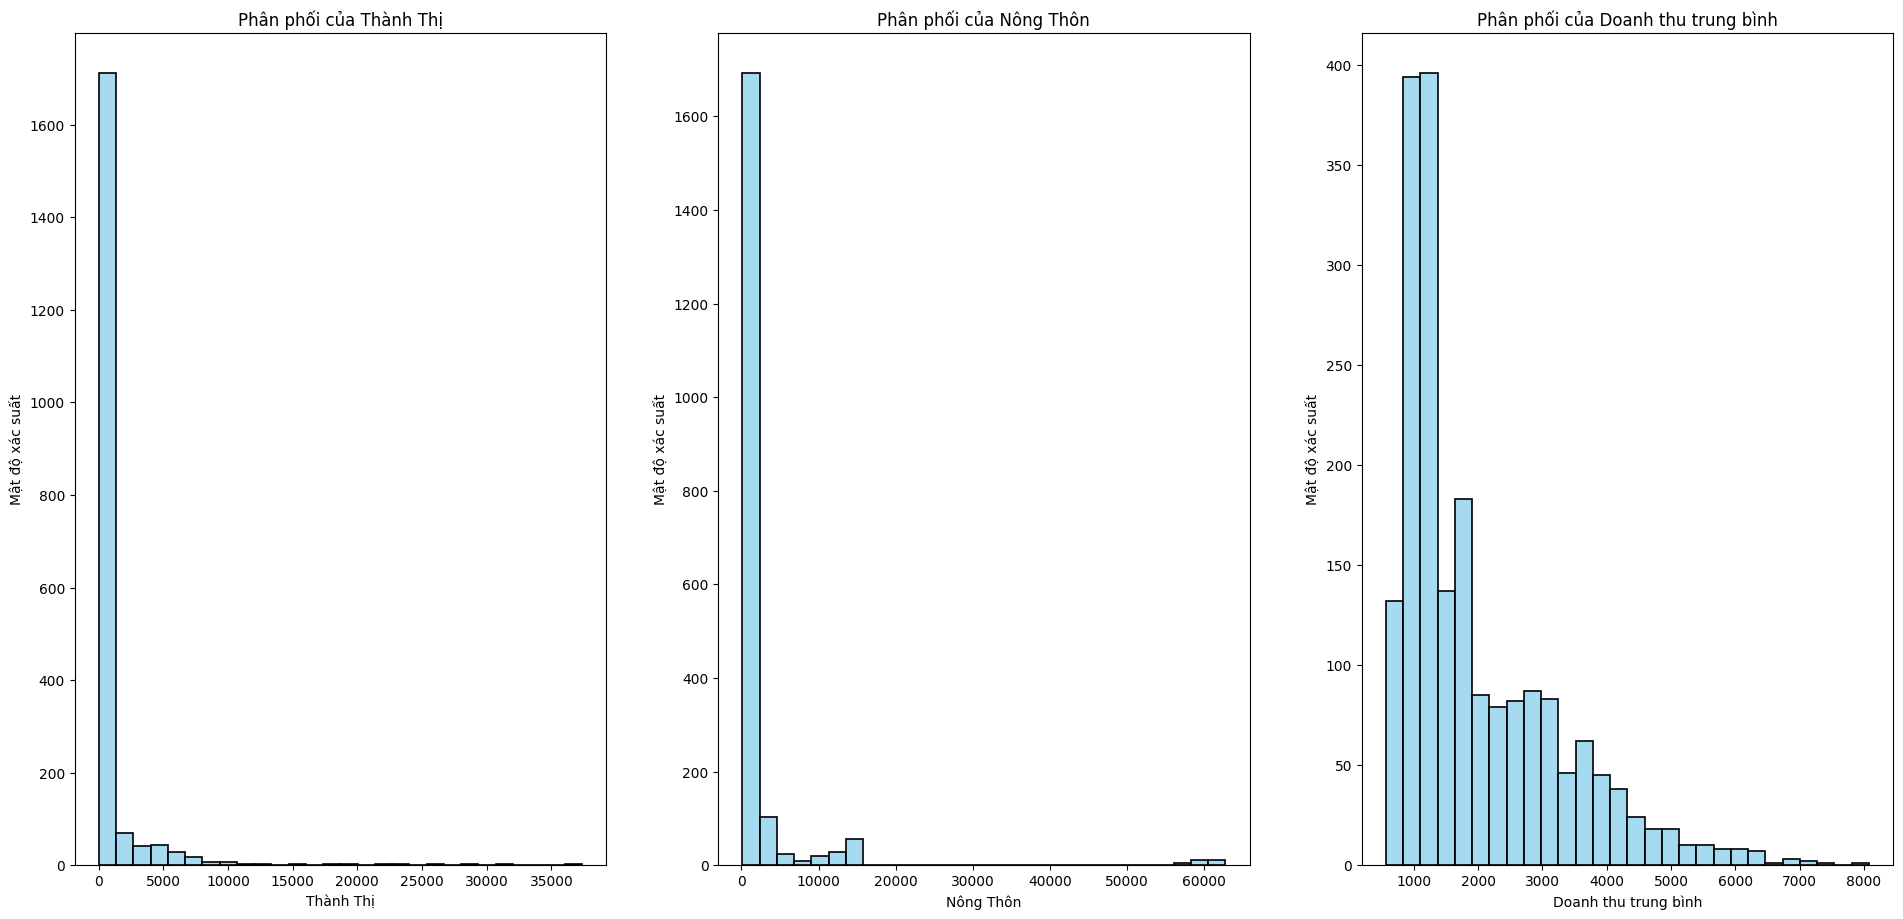

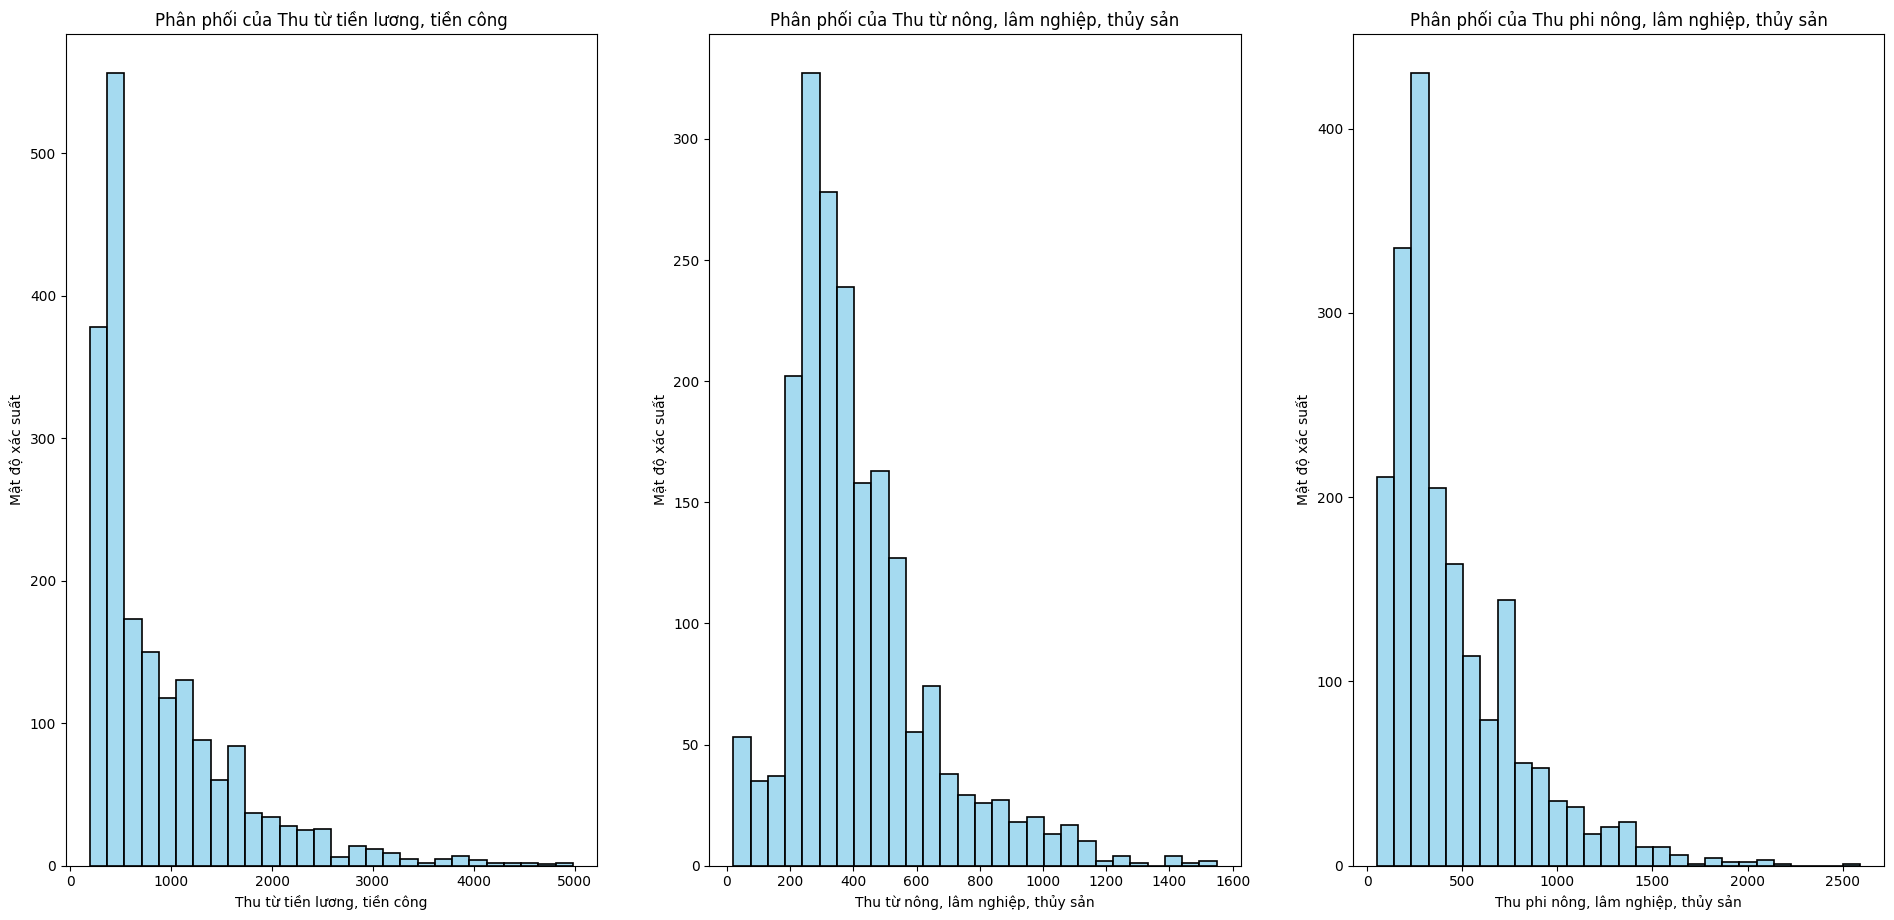

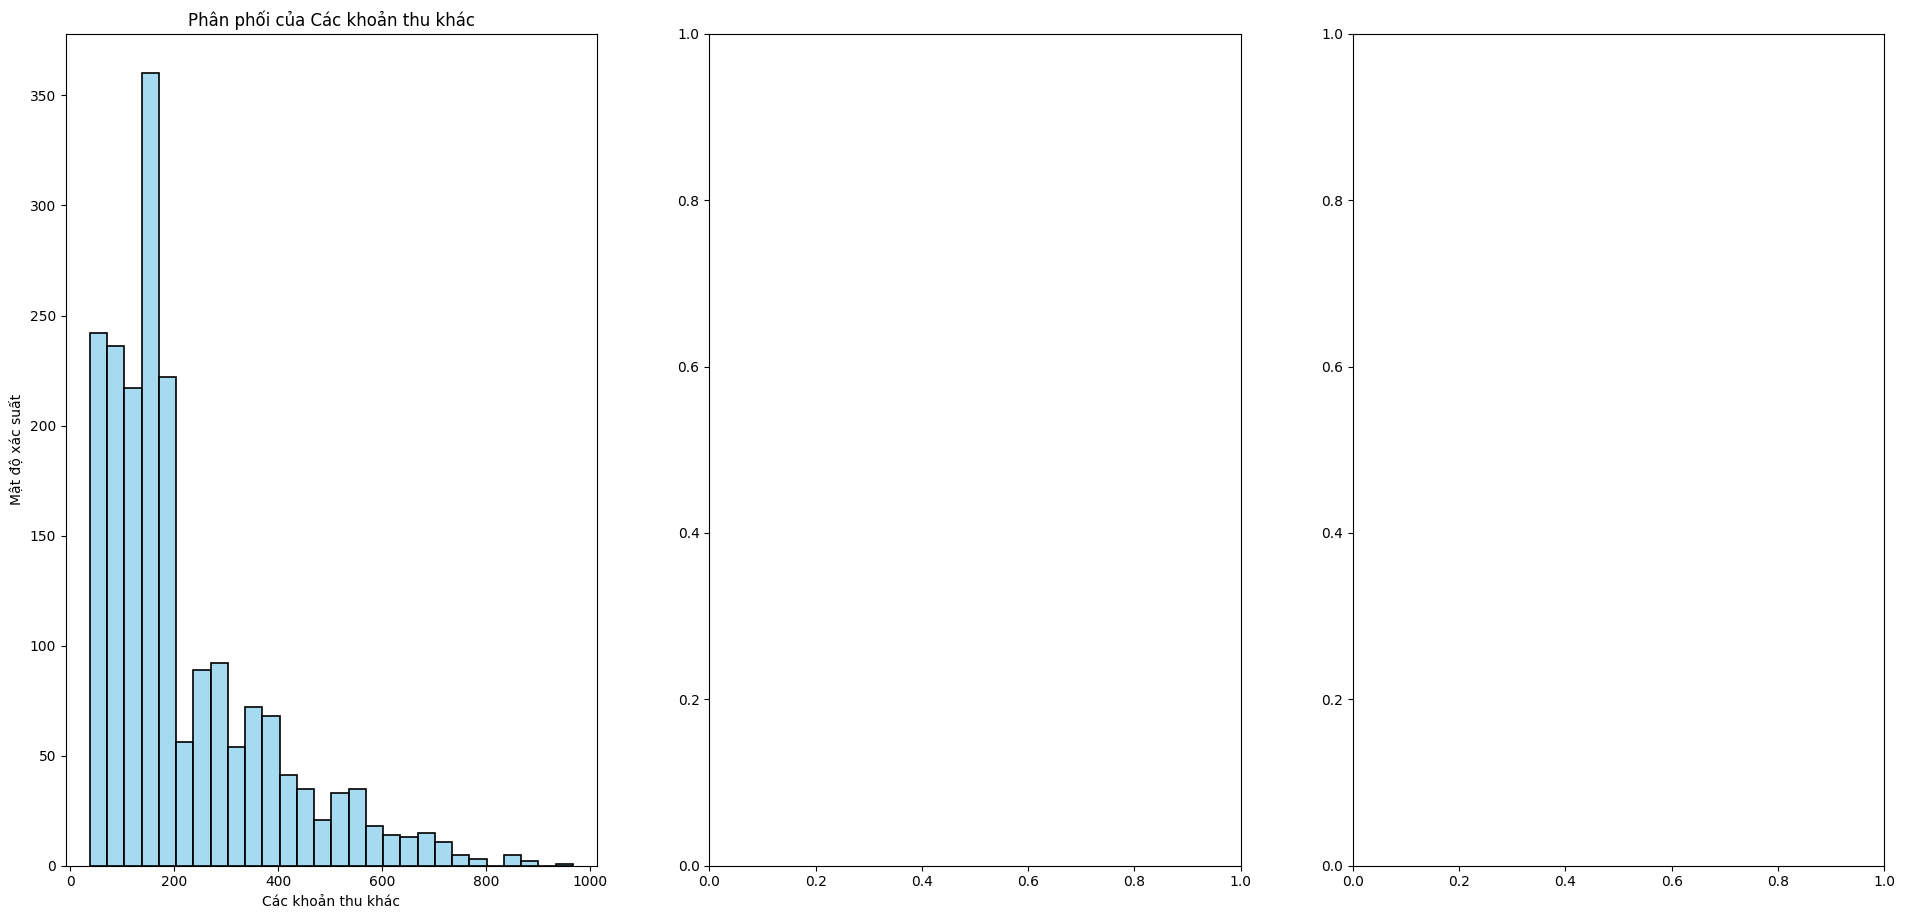

In [49]:
num_cols = 3
num_rows = 1
total_cols = len(raw_data_num_list)

num_plots = total_cols // num_cols
if total_cols % num_cols != 0:
    num_plots += 1

# Vẽ từng lần
for plot_num in range(num_plots):
    start_index = plot_num * num_cols
    end_index = min((plot_num + 1) * num_cols, total_cols)
    num_cols_in_plot = end_index - start_index

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    fig.tight_layout(pad=5.0)

    for i, col in enumerate(raw_data_num_list[start_index:end_index]):
        row_index = i // num_cols  # Số hàng trên mỗi subplot
        col_index = i % num_cols    # Số cột trên mỗi subplot
        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

        sns.histplot(raw_data[col], bins=28, color='skyblue', edgecolor='black', linewidth=1.2, ax=ax)
        ax.set_title(f'Phân phối của {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Mật độ xác suất')

    plt.show()


## **Nhận xét về phân phối và mô tả của các biến định lượng**
Đầu tiên thì bộ Data này thống kê số liệu theo `Tỉnh` qua các `Năm`.
-  Qua histogram theo biến `Năm` thì ta thấy số lượng dữ liệu thu thập được không có gì thay đổi sau 27 năm kể từ năm 1995. Điều này khá dễ hiểu vì Nước ta không có gì thay đổi về việc phân chia các khu vực.
- Hầu hết các phân bố sẽ có xu hướng lệch trái khá nhiều điểu này có thể giải thích: sẽ có số ít khu vực có sự tập trung dân số, kinh tế (vì vị trí địa lí, mức độ phát triển, nhu cầu việc làm,..), nên các khoảng giá trị càng lớn thì tần xuất của nó càng giảm.
- Phân phối của `Nam` và `Nữ` khá tương tự nhau cho thấy không có sự chênh lệch về tỉ lệ giới tính. Từ đó phân phối của  `Dân số trung bình ` có thể gần như là gấp đôi `Nam` vì được thống kê trên 2 cột `Nam` và `Nữ`.
- `Doanh thu trung bình` được tổng hợp từ `Thu từ tiền lương, tiền công`, `Thu từ nông, lâm nghiệp, thủy sản`, `Thu phi nông, lâm nghiệp, thủy sản`, `Các khoản thu khác` nên sẽ có phân phối là kết hợp của 4 phân phối trên.

#### **Kết luân**
- Nhìn chung, hầu hết các phân phối đều có phần bị lệch trái do dữ liệu chỉ tập trung vào một số giá trị nhất định.
- Đối với các cột quan trọng, dữ liệu phân phối có phần tuân theo phân phối chuẩn hơn

## **THỐNG KÊ MÔ TẢ CHO CÁC BIẾN ĐỊNH TÍNH**

**Danh sách các cột categorical**

In [55]:
def print_categorical_distribution(df, column):
    unique_count = len(df[column].unique())
    print("Số lượng giá trị riêng biệt:", unique_count)

    value_counts_percentage = df[column].value_counts(normalize=True) * 100
    print("Phân phối của giá trị (theo %):")
    print(value_counts_percentage)


In [56]:
raw_data_cate_list

['Tỉnh']

In [57]:
print_categorical_distribution(raw_data, 'Tỉnh')

Số lượng giá trị riêng biệt: 70
Phân phối của giá trị (theo %):
Tỉnh
CẢ NƯỚC        1.428571
Kon Tum        1.428571
Bình Phước     1.428571
Ðông Nam Bộ    1.428571
Lâm Ðồng       1.428571
                 ...   
Thanh Hoá      1.428571
Nghệ An        1.428571
Hà Tĩnh        1.428571
Quảng Bình     1.428571
Cà Mau         1.428571
Name: proportion, Length: 70, dtype: float64


Như đã nói ở trên bộ Data này thống kê số liệu theo `Tỉnh` qua các `Năm`. Và các khu vực nước ta không có sự thay đổi trong thời gian thống kê nên tỉ lệ các giá trị biết Cate `Tỉnh` là đồng đều.